## b968 - 30/06/2016 - MONSOON - LST survey

For this example we compare the brightness temperature measurements from the Heimann instrument on the aircraft with land surface temperature data from the MODIS instrument.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import datetime
import os

ROOT_DATA_PATH = '/home/axel/Dropbox/cis_workshop/data/b968'

os.chdir(ROOT_DATA_PATH)

### Converting the MODIS into netCDF

In [2]:
# Show information about the hdf content
# gdalinfo MOD11A1.A2016182.h24v06.006.2016241041630.hdf
#
# extract subset from hdf5 file
# We got the exact name of the subset from the gdalinfo command above
# see: http://osgeo-org.1560.x6.nabble.com/Extract-subdataset-from-netCDF-in-a-given-directory-td5161167.html
# gdal_translate -of netCDF HDF4_EOS:EOS_GRID:"MOD11A1.A2016182.h24v06.006.2016241041630.hdf":MODIS_Grid_Daily_1km_LST:LST_Day_1km MOD11A1.A2016182.h24v06.006.2016241041630.lst.nc
#
# Convert it to WGS84 projection with longitude and latitude
# gdalwarp -of netCDF -t_srs EPSG:4326 MOD11A1.A2016182.h24v06.006.2016241041630.lst.nc MOD11A1.A2016182.h24v06.006.2016241041630.4326.lst.nc
# ncdump -h MOD11A1.A2016182.h24v06.006.2016241041630.4326.lst.nc
# ncrename -v Band1,lst MOD11A1.A2016182.h24v06.006.2016241041630.4326.lst.nc

(26.0, 27.5)

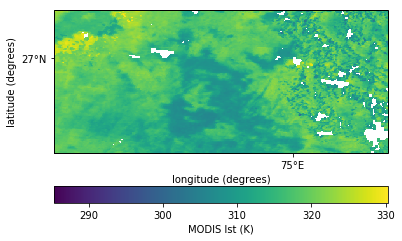

In [11]:
import cis
modis = cis.read_data(os.path.join(ROOT_DATA_PATH, 'MOD11A1.A2016182.h24v06.006.2016241041630.4326.lst.nc'), 'lst')

# scaling of the land surface temperature data
# https://gis.stackexchange.com/questions/72524/how-do-i-convert-the-lst-values-on-the-modis-lst-image-to-degree-celsius
modis.data *= 0.02

ax = modis.plot(label='MODIS lst (K)')

# change extend of plot
ax.set_xlim((72.5, 76.0))
ax.set_ylim((26.0, 27.5))

### Reading in brightness temperature from aircraft

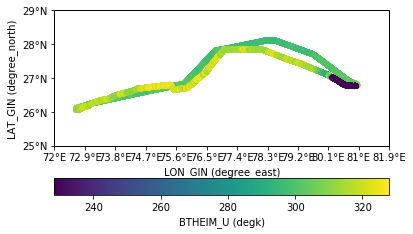

In [4]:
# reading the brightness temperature from the Heimann instrument on the FAAM aircraft
ara_bt = cis.read_data(os.path.join(ROOT_DATA_PATH, 'core_faam_20160630_v004_r0_b968_1hz_editted.nc'), 'BTHEIM_U', product='NCAR_NetCDF_RAF')
ara_bt.plot()

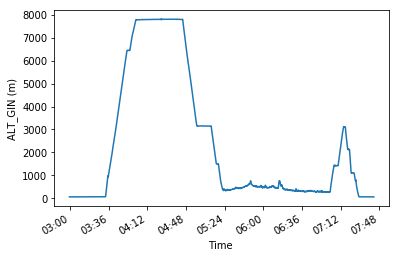

In [5]:
# reading in the gin altitude
ara_alt = cis.read_data(os.path.join(ROOT_DATA_PATH, 'core_faam_20160630_v004_r0_b968_1hz_editted.nc'), 'ALT_GIN', product='NCAR_NetCDF_RAF')

ara_alt.plot(xaxis='time')

For the further analysis we are interested in the low level leg which starts at about 05:25Z and ends at 07:00Z. Clipping the brightness data using the subset method.

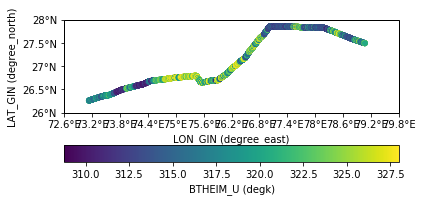

In [6]:
# Defining start and end time
stime = datetime.datetime.strptime('2016-06-30T05:25', '%Y-%m-%dT%H:%M')
etime = datetime.datetime.strptime('2016-06-30T07:00', '%Y-%m-%dT%H:%M')

# create a subset using the start and end time
ara_bt = ara_bt.subset(t=[stime, etime])
ara_bt.plot()

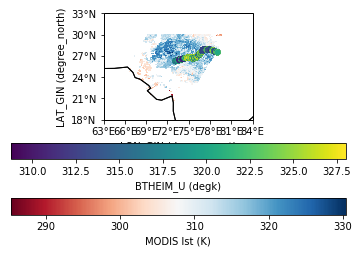

In [12]:
ax = modis.plot(label='MODIS lst (K)', cmap='RdBu')
ara_bt.plot(ax=ax)

In [8]:
# collocate brightness temperature with MODIS
ara_bt2 = ara_bt.collocated_onto(modis, kernel='mean')
print(ara_bt2)

GriddedDataList: 
0: BTHEIM_U / (degk)                   (latitude: 1505; longitude: 2555)


/usr/local/lib/python2.7/dist-packages/Iris-1.12.0.dev0-py2.7.egg/iris/analysis/cartography.py:368: UserWarning: Assuming spherical earth from ellipsoid.
  warnings.warn("Assuming spherical earth from ellipsoid.")


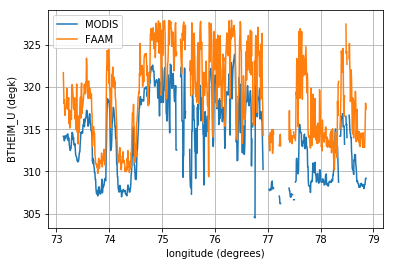

In [9]:
# TODO: This is probably not the best way to do this
# copy the mask over from the brightness temperature
modis.data.mask[:] = ara_bt2[0].data.mask[:]

# remove the latitude dimensions
modis2 = modis.collapsed('latitude', how='mean')
ara_bt2 = ara_bt2.collapsed('latitude', how='mean')

# plot MODIS and FAAM data against longitude for comparison
modis2.plot(label='MODIS')
ax = plt.gca()
ara_bt2.plot(ax=ax, label='FAAM')

ax.grid(True)

In [ ]:
# TODO: Maybe a scatter plot of the FAAM vs. MODIS would be nice too